In [95]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os

from mod import *

# 4장 - 신경망 학습

## 4.2 손실함수

### 4.2.1 평균 제곱 오차

In [11]:
y = [.1, .05, .6, 0, .05, .1, 0, .1, 0, 0]
t = np.zeros(len(y))
t[2] = 1

t1 = np.zeros(len(y))
t1[3] = 1

In [15]:
sum((y-t)**2) / 2

-2.3279029009783354

In [18]:
sum((y-t1)**2) / 2

-0.36025276528661637

In [19]:
def mse(y, t):
    return np.sum((y-t)**2) / 2

In [20]:
mse(y, t)

0.09750000000000003

### 4.2.2 교차엔트로피 오차

In [116]:
def _cee(y, t):
    delta = 1e-7
    arr = np.log(np.array(y) + delta)
    return -np.sum(arr * t)

In [64]:
cee(y, t)

0.510825457099338

In [65]:
cee(y, t1)

16.11809565095832

### 4.2.3 미니배치 학습

In [91]:
cwd = os.getcwd()
sys.path.append(os.getcwd())
os.chdir('./deep-learning-from-scratch-master')

from dataset.mnist import load_mnist

In [93]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

In [97]:
prints(x_train)
prints(t_train)

shape-x_train:(60000, 784)
shape-t_train:(60000, 10)


In [104]:
batch_size = 10

train_size = x_train.shape[0]
batch_mask = np.random.choice(train_size, batch_size)

x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

### 4.2.4 (배치용) 교차 엔트로피 오차 구현하기

In [125]:
def cee(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size) ,t] + 1e-7)) / batch_size

## 4.3 수치 미분

### 4.3.1 미분

In [126]:
def num_diff(f, x):def cee(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size) ,t] + 1e-7)) / batch_size
    h = 1e-4
    return (f(x+h)-f(x-h)) / (2*h)

In [127]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

In [146]:
def gradient_graph(f, x):
    a = num_diff(f, x)
    b = function_1(x) - a * x
    range_x = np.arange(x-10, x+10, 0.1)
    y = a * range_x + b
    plt.plot(range_x, y)

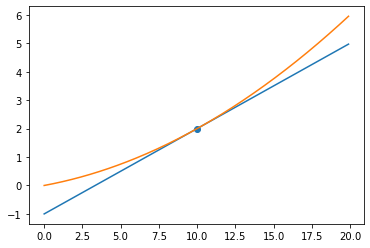

In [150]:
x = np.arange(0, 20, .1)
y = function_1(x)

x_value = 10
gradient_graph(function_1, x_value)
plt.plot(x, y)
plt.scatter(x_value, function_1(x_value))

plt.show()

In [153]:
num_diff(function_1, 10)

0.2999999999986347

### 4.3.3 편미분

In [160]:
def function_2(x):
    return x[0]**2 + x[1]**2

assert function_2([1, 2]) == 5

In [164]:
def function_tmp1(x0):
    return x0**2 + 4.0**2.0
num_diff(function_tmp1, 3.0)

6.00000000000378

In [165]:
def function_tmp2(x1):
    return 3.0**2 + x1**2.0
num_diff(function_tmp2, 4.0)

7.999999999999119

## 4.4 기울기

In [188]:
h = 1e-4
def f(x):
    return x[0]**2 + x[1]**2

assert f([1, 2]) == 5

In [219]:
def num_grad(f, x):
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]

        #f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)

        #f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val

    return grad

assert all(num_grad(f, np.array([3., 4.])).round() == np.array([6., 8.]))

### 4.4.1 경사법(경사하강법)

In [233]:
def grad_descent(f, init_x, lr=.01, step_num=100):
    x = init_x
    for _ in range(step_num):
        x -= lr * num_grad(f, x)
    return x

In [244]:
init_x = np.array([-3., 4.])
lr = .1
step_num = 100

In [245]:
grad_descent(f=f, init_x=init_x, lr=lr, step_num=step_num)

array([-6.11110793e-10,  8.14814391e-10])

In [247]:
import time

In [255]:
#todaytime = 1610353965.7306166
#page = 131
#next_thing_to-do = "matplotlib을 이용하여 변화를 추적한다"